## Model simuleren: Monod model

$$\frac{dX}{dt}= \mu_{max}\frac{S}{K_{S}+S}X - \frac{Q}{V}X$$

$$\frac{dS}{dt}= -\frac{1}{Y} \mu_{max}\frac{S}{K_{S}+S}X + \frac{Q}{V}(S_{in} - S)$$

In [1]:
# %load load_libs.py
%matplotlib inline

# Importeren van functionaliteiten
#import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import math
from IPython.display import Image
from ipywidgets import interact, fixed, FloatSlider, IntSlider, ToggleButtons

%load_ext autoreload
%autoreload 1
import sys
import os
sys.path.append("functions")
%aimport general_functions


In [2]:
%aimport monod
functie_afgeleiden = monod.model_afgeleiden

## Model simuleren

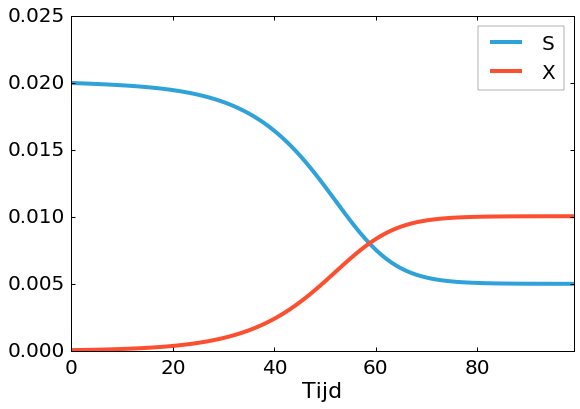

In [3]:
df = general_functions.model(
    np.arange(0, 100, 1), # tijdstappen
    [0.00005, 0.02], # initiële condities
    ['X','S'], # namen variabelen
    functie_afgeleiden, # naam functie afgeleiden
    returnDataFrame=True, plotresults=True,
    # vanaf hier: functie specifieke parameters
    mu_max=0.3, Q=2, V=20, Y=0.67, K_S=0.01, S_in=0.02)

$$\frac{dX}{dt}= \mu_{max}\frac{S}{K_{S}+S}X - \frac{Q}{V}X$$

$$\frac{dS}{dt}= -\frac{1}{Y} \mu_{max}\frac{S}{K_{S}+S}X + \frac{Q}{V}(S_{in} - S)$$

## Impact initiële conditie

In [4]:
def interactive_model(logX, logS):
    general_functions.model(
        np.arange(0, 100, 1), # tijdstappen
        [10**logX, 10**logS], # initiële condities
        ['X','S'], # namen variabelen
        functie_afgeleiden, # naam functie afgeleiden
        returnDataFrame=True, plotresults=True,
        # vanaf hier: functie specifieke parameters
        mu_max=0.3, Q=2, V=20, Y=0.67, K_S=0.01, S_in=0.02)

<function __main__.interactive_model>

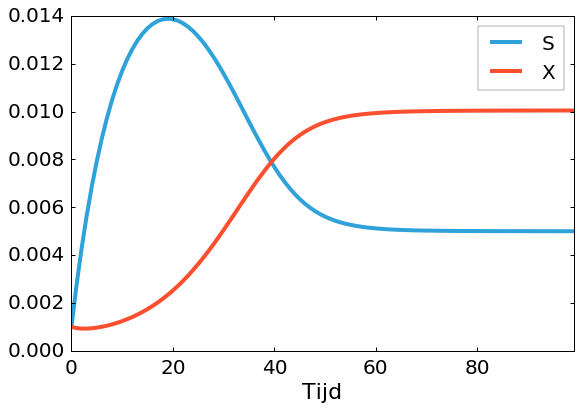

In [5]:
interact(interactive_model,
         logX=IntSlider(value=-3, min=-6, max=1, step=1, description='log(X)', continuous_update=False),
         logS=IntSlider(value=-3, min=-6, max=1, step=1, description='log(S)', continuous_update=False))

$$\frac{dX}{dt}= \mu_{max}\frac{S}{K_{S}+S}X - \frac{Q}{V}X$$

$$\frac{dS}{dt}= -\frac{1}{Y} \mu_{max}\frac{S}{K_{S}+S}X + \frac{Q}{V}(S_{in} - S)$$

## Impact parameters (deel 1)

<function general_functions.model>

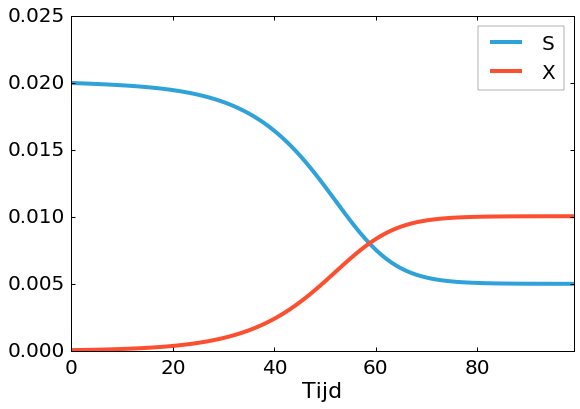

In [6]:
interact(general_functions.model,
         tijdstappen=fixed(np.arange(0, 100, 1)), # tijdstappen
         init=fixed([0.00005, 0.02]), # initiële condities
         varnames=fixed(['X','S']), # namen variabelen
         f=fixed(functie_afgeleiden), # naam functie afgeleiden
         returnDataFrame=fixed(False), plotresults=fixed(True),
         # vanaf hier: functie specifieke parameters
         mu_max=FloatSlider(value=0.3, min=0.01, max=2, step=0.01, description='mu_max', continuous_update=False),
         Q=fixed(2), V=fixed(20),
         Y=FloatSlider(value=0.67, min=0.1, max=1, step=0.01, description='Y', continuous_update=False),
         K_S=FloatSlider(value=0.01, min=0.001, max=0.02, step=0.001, description='K_s', continuous_update=False), 
         S_in=fixed(2e-2))

$$\frac{dX}{dt}= \mu_{max}\frac{S}{K_{S}+S}X - \frac{Q}{V}X$$

$$\frac{dS}{dt}= -\frac{1}{Y} \mu_{max}\frac{S}{K_{S}+S}X + \frac{Q}{V}(S_{in} - S)$$

## Impact parameters (deel 2)

<function general_functions.model>

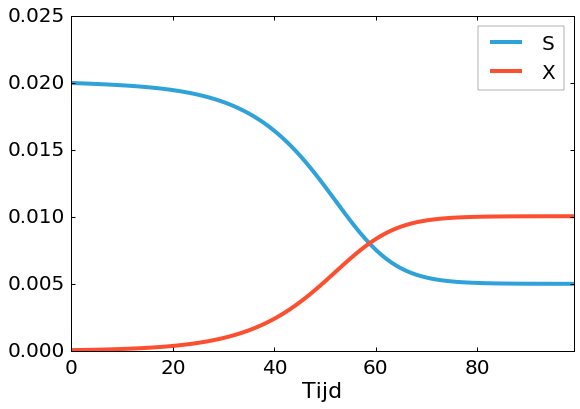

In [7]:
interact(general_functions.model,
         tijdstappen=fixed(np.arange(0, 100, 1)), # tijdstappen
         init=fixed([0.00005, 0.02]), # initiële condities
         varnames=fixed(['X','S']), # namen variabelen
         f=fixed(functie_afgeleiden), # naam functie afgeleiden
         returnDataFrame=fixed(False), plotresults=fixed(True),
         # vanaf hier: functie specifieke parameters
         mu_max=fixed(0.3),
         Q=FloatSlider(value=2, min=.1, max=5, step=0.1, description='Q', continuous_update=False),
         V=FloatSlider(value=20, min=1, max=50, step=1, description='V', continuous_update=False),
         Y=fixed(0.67), K_S=fixed(0.01), 
         S_in=FloatSlider(value=0.02, min=0.001, max=0.1, step=0.001, description='S_in', continuous_update=False))

$$\frac{dX}{dt}= \mu_{max}\frac{S}{K_{S}+S}X - \frac{Q}{V}X$$

$$\frac{dS}{dt}= -\frac{1}{Y} \mu_{max}\frac{S}{K_{S}+S}X + \frac{Q}{V}(S_{in} - S)$$

# Sensitiviteit

<function general_functions.sensitiviteit>

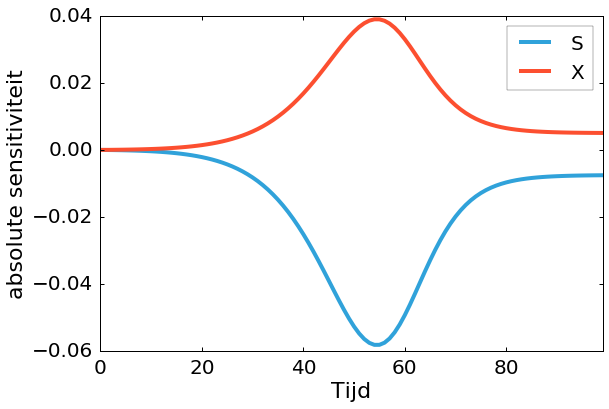

In [8]:
interact(general_functions.sensitiviteit,
    tijdstappen=fixed(np.arange(0, 100, 1)), # tijdstappen
    init=fixed([0.00005, 0.02]), # initiële condities
    varnames=fixed(['X','S']), # namen variabelen
    f=fixed(functie_afgeleiden), # naam functie afgeleiden
    parameternaam=ToggleButtons(options=['mu_max', 'Q', 'V', 'Y', 'K_S', 'S_in']),
    log_perturbatie = IntSlider(value=-4, min=-15, max=-1, step=1, continuous_update=False),
    soort=ToggleButtons(options=[
            'absolute sensitiviteit', 'relatieve sensitiviteit parameter',
            'relatieve sensitiviteit variabele','relatieve totale sensitiviteit']),
    # vanaf hier: functie specifieke parameters
    mu_max=fixed(0.3), Q=fixed(2), V=fixed(20), Y=fixed(0.67),
    K_S=fixed(0.01), S_in=fixed(0.02))

# Calibratie

In [9]:
model_name = "monod"
with open(os.path.join(os.curdir, "data", model_name+"_functioncall.txt"), "r") as text_file:
    print(text_file.read())

df_base = general_functions.model(
    np.arange(0, 100, 1), # tijdstappen
    [0.00005, 0.02], # initiële condities
    ['X','S'], # namen variabelen
    functie_afgeleiden, # naam functie afgeleiden
    returnDataFrame=True, plotresults=True,
    # vanaf hier: functie specifieke parameters
    mu_max=0.3, Q=2, V=20, Y=0.67, K_S=0.01, S_in=0.02)


In [10]:
noise_level = 0.1
thepath = os.path.join(os.curdir, "data", model_name+"_data_noisy_{}.csv".format(noise_level))
df_noisy = pd.read_csv(thepath, index_col=0)

In [11]:
def sim_model(args):
    mu_max, K_S = args
    sim = general_functions.model(
    np.arange(0, 100, 1), # tijdstappen
    [0.00005, 0.02], # initiële condities
    ['X','S'], # namen variabelen
    functie_afgeleiden, # naam functie afgeleiden
    returnDataFrame=True, plotresults=False,
    # vanaf hier: functie specifieke parameters
    mu_max=mu_max, Q=2, V=20, Y=0.67, K_S=K_S, S_in=0.02)
    return sim

def optimizer(args, obj_func=general_functions.sse, data=df_noisy):
    sim = sim_model(args)
    return obj_func(sim, data)

/home/jos/anaconda/envs/py35/lib/python3.5/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


<function general_functions.plot_calib>

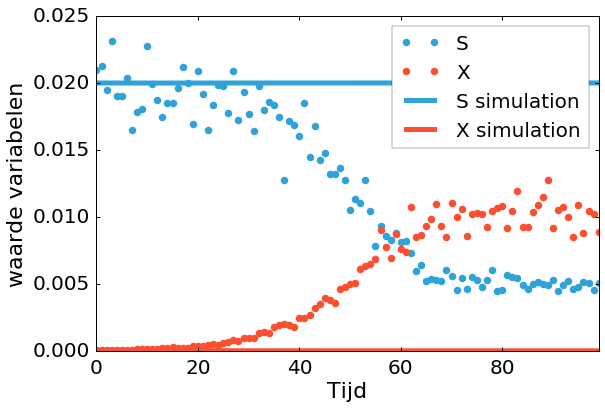

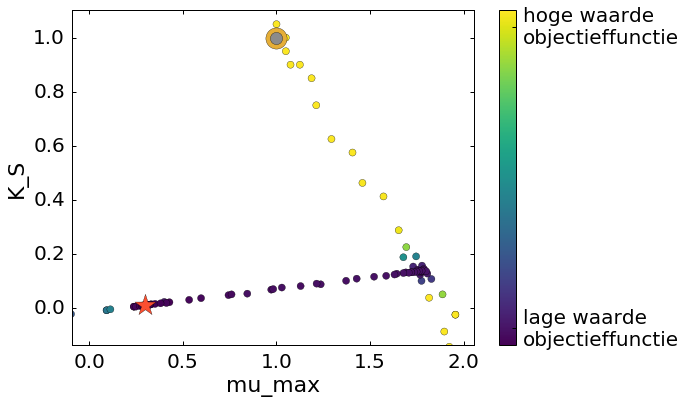

In [14]:
x0 = [1, 1]
parameters,results = general_functions.track_calib(optimizer,
    x0, param_names=['mu_max', 'K_S'], method='Nelder-Mead')
interact(general_functions.plot_calib,
         parameters=fixed(parameters), results=fixed(results),
         i=IntSlider(value=0, min=0, max=parameters.shape[0]-1, step=1, continuous_update=False),
         data=fixed(df_noisy), sim_model=fixed(sim_model))
#general_functions.plot_calib(parameters, results, parameters.shape[0]-1, df_noisy)

/home/jos/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/jos/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


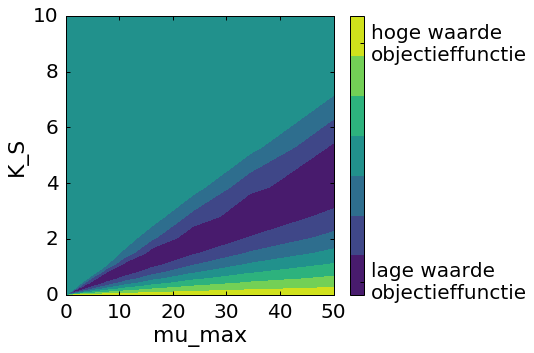

In [13]:
general_functions.plot_contour_monod(optimizer)